#Mapas (Auto-organizáveis) de Kohonen - Self Organizing Feature Maps (SOFM)

##Arquitetura das SOFMs

As SOFMs têm somente uma camada de saída que representa um *lattice* (que pode ser 1D, 2D ou 3D). Ou seja, a definição de vizinhança é pré-determinada. Na figura, o *lattice* de 2 dimensões tem a vizinhança definida hexagonalmente. Ou seja, cada neurônio (exceto os da borda) é vizinho de outros 6.


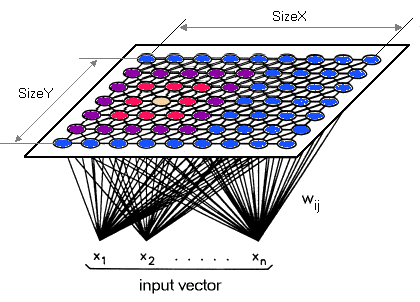

Este modelo de RNA tem inspiração biológica (agrupamento de neurônios no sistema auditivo, visual, etc.) e apresenta características diferentes do modelo de RNA apresentado anteriormente (Perceptron e Redes neurais Multicamadas / Backpropagation).

.

Referência:

*Self-organized formation of topologically correct feature maps*
Teuvo Kohonen - Biological Cybernetics volume 43, (1982).

.

O primeiro conceito distinto é que se trata de uma rede neural **competitiva**, ou seja, uma rede onde os neurônios, de certo modo, competem entre sí para ser o representante de cada entrada apresentada à RNA.

.

E esse comportamento dispensa o 'treinador' na fase se aprendizagem. Ou seja, não se usa o erro da saída para ajustar os pesos. Ao invés disso, a competição entre os neurônios é usada como base do algoritmo de aprendizagem.

Esse tipo de aprendizado é chamado de **não-supervisionado**.

.

Como o próprio nome já diz, essa rede é **auto-organizável**.

Ou seja, ajusta seus pesos de modo autonômo de acordo com as entradas apresentadas.



---



##Aprendizagem

Em termos gerais, o aprendizado das SOFMs acontece da seguinte maneira:


1.   Apresenta-se um um novo exemplo do dataset de treinamento;
2.   Todos neurônios do *lattice* competem entre sí para ver quem é mais semelhante à entrada (exemplo apresentado);
3.  Escolhe-se o neurônio mais parecido (vencedor);
4.  Ajusta-se os pesos do vencedor de modo que ele fique ainda mais parecido com a entrada;
5.  Ajusta-se (com um ajuste sempre menor do que o do vencedor) também os pesos dos outros neurônios, porém de acordo com a vizinhança de cada um deles com o vencedor. Quanto mais perto, maior é o ajuste. - funções comumente usadas para definir quão grande seria o ajuste são a gaussiana e o 'chapéu mexicano'.

-- ajuste dos pesos --

W_u(s+1) = W_u(s) + eta(s) \* Viz(u, s, nó) \* (X(t) - W_u(s))

A medida que essa iteração vai se repetindo para cada exemplo (e os pesos sendo ajustados), a taxa de aprendizado vai diminuindo, bem como a influência no ajuste dos neurônios não vencedores.

Por fim, os pesos dos neurônios se ajustarão de modo a cobrir proporcionalmente toda a distribuição dos dados apresentados.

https://pt.wikipedia.org/wiki/Ficheiro:StepTrainingSOM.gif



Fases do processo de aprendizado

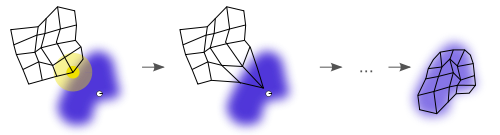



---



## Biblioteca MiniSOM

Como quase tudo em Python, há uma biblioteca com uma implementação básica das SOFMs.

https://github.com/JustGlowing/minisom/



---



##Aplicações

Existe uma infinidade de aplicações para as SOFMs, desde o simple agrupamento (*clustering*) à classificação não-supervisionada.

No final deste notebook há uma inusitada aplicação que consiste em utilizar o QE de uma SOFM para detectar alterações de imagens em séries.

O **QE - erro de quantificação** de uma rede SOFM é dado pela média dos erros entre todos exemplos em um dataset e o seu respectivo neurônio vencedor (mais semelhante) da SOFM.

.

Outra medida relevante é o **erro de topologia** que é calculado pela proporção de que, dado um exemplo de entrada, o segundo melhor (mais semelhante) não seja vizinho ao vencedor (neurônio).

Ou seja, quanto menor, melhor.

.

Porém, a aplicação mais comum é a **redução de dimensionalidade**.

As SOFMs permitem que transformemos, por exemplo, os dados em 10 - 100 dimensões em uma dimensão menor (geralmente para 2D) que nos permite visualizar a distribuição dos dados.

As SOFMs são semelhantes à Análise da Componente Principal (PCA). Porém - diferentemente da PCA - as SOFMs mantêm as características topológicas dos dados pois se baseia na diferença (distância) dos dados.

A figura abaixo ilustra a diferença entre os resultados da PCA e da SOFM para reduzir um dataset em 2D para 1D.

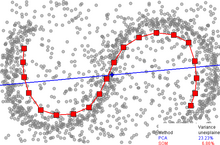



---



## Exemplo ilustrativo

O dataset da Iris apresenta 4 dimensões referentes aos comprimentos e larguras das pétalas e sépalas das flores.

Consequentemente, não é possível mostrar esses dados em um eixo cartesiano (2D ou 3D). O que se faz é mostrar uma projeção. Porém existem infinitas projeções possíveis.

O código abaixo ilustra como se pode usar as SOFM para reduzir a dimensionalidade desses dados e, consequentemente, visualiza-los em um plano cartesiano.

In [2]:
from minisom import MiniSom
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# dataset Iris
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

# classe (saída) / espécie de Iris
y = df.iloc[:, 4].values

# variáveis independentes (entradas) / comps sepal e petal
X = df.iloc[:, [0,1,2,3]].values

In [ ]:
# normalizando entrada   --> muito relevante porque o método se baseia em distância

# valores com média = 0 e std = 1
Xn1 = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
# valores em [0, 1)
Xn2 = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [ ]:
# parâmetros para plotar o gráfico
dicion = {'Iris-setosa':0, 'Iris-versicolor': 1, 'Iris-virginica':2}
label_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
markers = ['o', 's', 'D']
colors = ['red', 'green', 'blue', 'yellow']

In [ ]:
# se desejar verificar a classe/objeto
??MiniSom

In [ ]:
# definindo um grid 2D com
linhas = 10
colunas = 10

# criando o modelo
som = MiniSom(linhas, colunas, 4, sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=1234)
# treinando o modelo
som.train(X, 10000, verbose=True)  # 100   #1000  #10000

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for espec in np.unique(y):
    idx_target = y==espec
    # pontos dentro da mesma célula são espalhados aleatoriamente (para melhor visualização)
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[3])
plt.grid()
plt.show()

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in X])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for espec in np.unique(y):
    idx_target = y==espec
    # pontos dentro da mesma célula são espalhados aleatoriamente (para melhor visualização)
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]])
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [ ]:
entradas = [X, Xn1, Xn2]
nomes = ['Não normalizado', 'Normalização 1', 'Normalização 2']

for ind in range(3):
  som = MiniSom(linhas, colunas, 4, sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=1234)
  som.train(entradas[ind], 10000, verbose=True)
  plt.figure(figsize=(6, 5))
  plt.pcolor(som.distance_map().T, cmap='bone_r')  # mapa de distância no background
  plt.colorbar()

  for i, x in enumerate(entradas[ind]):
    w = som.winner(x)
    # marca o vencedor (mais próximo)
    plt.plot(w[0]+.5, w[1]+.5, markers[dicion[y[i]]],  markerfacecolor='None',
             markeredgecolor=colors[dicion[y[i]]], markersize=10, markeredgewidth=2)
  plt.title(nomes[ind])
  plt.show()



---



## Usando o SOFM como classificador


In [ ]:
# separando o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1234)

# criando o modelo SOFM
som = MiniSom(10, 10, 4, sigma=1.5, learning_rate=.5, neighborhood_function='gaussian', random_seed=1234)

# treinando o modelo
som.train(X_train, 10000, verbose=True)


In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in X_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

we_x, we_y = zip(*[som.winner(d) for d in X_test])
we_x = np.array(we_x)
we_y = np.array(we_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for espec in np.unique(y_train):
    idx_target = y_train==espec
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]])

for espec in np.unique(y_test):
    idx_target = y_test==espec
    plt.scatter(we_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                we_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]],alpha=0.2)
plt.title('Treino - Teste')
plt.grid()
plt.show()

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in X_train])
w_x = np.array(w_x)
w_y = np.array(w_y)

we_x, we_y = zip(*[som.winner(d) for d in X_test])
we_x = np.array(we_x)
we_y = np.array(we_y)

plt.figure(figsize=(6, 5))
plt.pcolor(som.distance_map().T, cmap='binary', alpha=.8)
plt.colorbar()

for i, x in enumerate(X_train):
    w = som.winner(x)
    # marca o vencedor (mais próximo)
    plt.plot(w[0]+.5, w[1]+.5, markers[dicion[y_train[i]]],  markerfacecolor='None',
             markeredgecolor=colors[dicion[y_train[i]]], markersize=10, markeredgewidth=2)

for espec in np.unique(y_test):
    idx_target = y_test==espec
    plt.scatter(we_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                we_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                s=50, c=colors[dicion[espec]], label=label_names[dicion[espec]],alpha=0.2)
plt.title('Treino - Teste')
plt.grid()
plt.show()



---



##Exemplo de aplicação da SOFM

O cálculo do *QE - quantization error* de cada imagem pode ser usado para identificar variações sutis em imagens de modo automático. Particularmente, neste exemplo o QE está muito correlacionado com o nível de água do lago.

Mapa de Kohonen 4x4 foi treinado por 10000 iterações com os dados (R, G, B) dos pixels das imagens de satélite de vários anos.



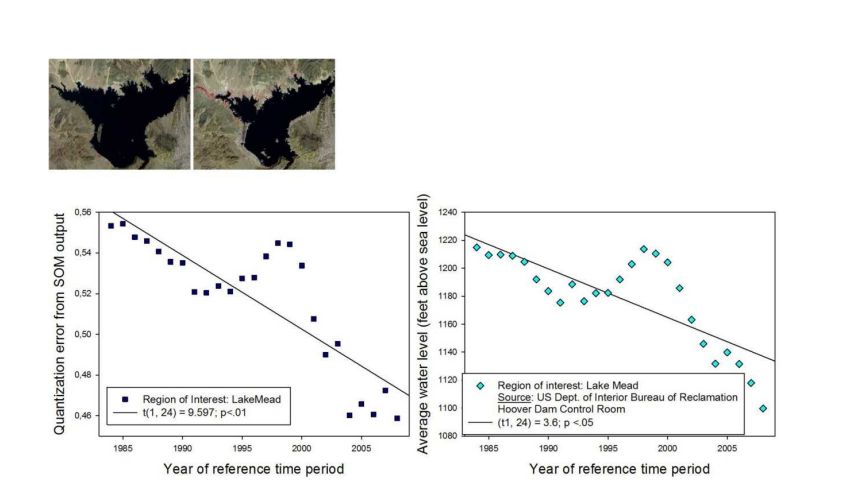

https://www.sciencedirect.com/science/article/am/pii/S089360801930231X



---



##Atividades de complementação (sugestão)

1. Refaça os testes variando os parâmetros do aprendizado/SOFM: taxa de aprendizado, função vizinhança, sigma, quantidade de neurônios no grid, etc.) e verifique/analise os resultados.


2. Tente aplicar as SOFMs (este notebook) no problema de classificação (dataset) que você resolveu previamente usando as Redes Neurais Multicamadas.